In [ ]:
import pandas as pd

# Load the Excel file located in the '../data/' folder
# Specify the sheet name "List" to load that specific sheet
df = pd.read_excel("../data/Hackathon_MainData.xlsx", sheet_name="List")

# Preview the first few rows of the dataset to understand the structure
df.head()

# ℹPrint basic info about the dataset: number of entries, columns, data types
df.info()

# Check for missing values in each column
df.isnull().sum()

# Count how many users fall into each 'MusteriProfili' (Customer Profile) category
df['MusteriProfili'].value_counts()

# Count how many users fall into each 'Mapin Segment' (Market Segment) category
df['Mapin Segment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MusteriKodu            786 non-null    int64  
 1   MusteriBolge1          786 non-null    object 
 2   MusteriBolge2          786 non-null    object 
 3   MusteriBolge3          786 non-null    object 
 4   MusteriBolge4          786 non-null    object 
 5   SatisKanali            786 non-null    object 
 6   lisansNo               786 non-null    object 
 7   SatisHacmi             786 non-null    object 
 8   DiageoSatisHacmi       786 non-null    object 
 9   RutAdi                 786 non-null    object 
 10  RutgrupKod             784 non-null    float64
 11  SatisTemsilcisi        784 non-null    object 
 12  StTakipKod             784 non-null    float64
 13  SatisSefi              784 non-null    object 
 14  SonGuncellenmeZamani   0 non-null      float64
 15  DDeger

Mapin Segment
D3-B    77
D2-B    64
R1-A    55
R3-C    53
D3-C    51
R1-B    46
R2-B    46
D0-B    34
D4-C    32
D1-A    32
R3-B    28
R0-B    27
D4-B    27
D2-A    26
D3-A    24
D1-B    21
H2      18
R2-C    18
H1      15
R2-A    12
R4-B    11
D2-C    11
R3-D    10
R4-C     9
R1-C     7
R5-D     6
R4-D     5
D4-A     4
R3-A     3
D5-C     3
D5-D     3
R5-C     2
D3-D     2
D4-D     2
D1-C     1
H0       1
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Read the Parquet file containing mobility data
# The file contains raw location pings from mobile devices
mobility_df = pd.read_parquet("../data/MobilityDataMay2024.paraquet", engine="pyarrow")

# Convert the UNIX timestamp column to human-readable datetime format
mobility_df["timestamp"] = pd.to_datetime(mobility_df["timestamp"], unit="s")

# Display the top 10 districts based on the number of recorded signals
# This helps to see where user activity is concentrated
mobility_df["district"].value_counts().head(10)

# Show the first few rows of the data for exploration and structure inspection
mobility_df.head()



,timestamp,device_aid,latitude,longitude,horizontal_accuracy,altitude,altitude_accuracy,location_method,ip,os,region,district,neighborhood,airport,poi_name,poi_leisure,poi_amenity,grid_id,province
0,2024-05-24 15:09:31,4d4b939f-3f71-4366-aea0-ebfbb1906b9f,40.987983,29.027896,11.9,70.1,0.0,fused,176.55.74.51,Android,Marmara Bölgesi,Kadıköy,Caferağa Mahallesi,NaN,,,NaN,4100902,Istanbul
1,2024-05-24 15:26:30,30c55c28-45e8-6980-ad1d-7064b7c84051,40.988467,29.109296,12.0,58.4,0.0,gps,176.54.104.86,Android,Marmara Bölgesi,Ataşehir,Atatürk Mahallesi,NaN,,,NaN,4100910,Istanbul
2,2024-05-24 15:10:18,d9287169-2268-4958-89dd-192d25dec817,41.023274,29.094867,13.5,188.3,0.0,fused,,Android,Marmara Bölgesi,Ümraniye,Namık Kemal Mahallesi,NaN,,,NaN,4104909,Istanbul
3,2024-05-24 15:01:19,e55c0589-0589-4539-9783-f96448f259f2,40.994214,29.151767,15.9,160.2,5.0,fused,,Android,Marmara Bölgesi,Ataşehir,Yenişehir Mahallesi,NaN,,,NaN,4101915,Istanbul
4,2024-05-24 15:18:45,35b845d0-fba5-412a-a8f1-f987fa94ffaa,40.997840,29.027981,7.3,12.6,0.0,gps,176.30.255.159,iOS,Marmara Bölgesi,Kadıköy,Rasimpaşa Mahallesi,NaN,,,NaN,4101902,Istanbul


/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/112006666.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  enriched_df = combined.merge(amenities_df, on="district", how="left").fillna(0)


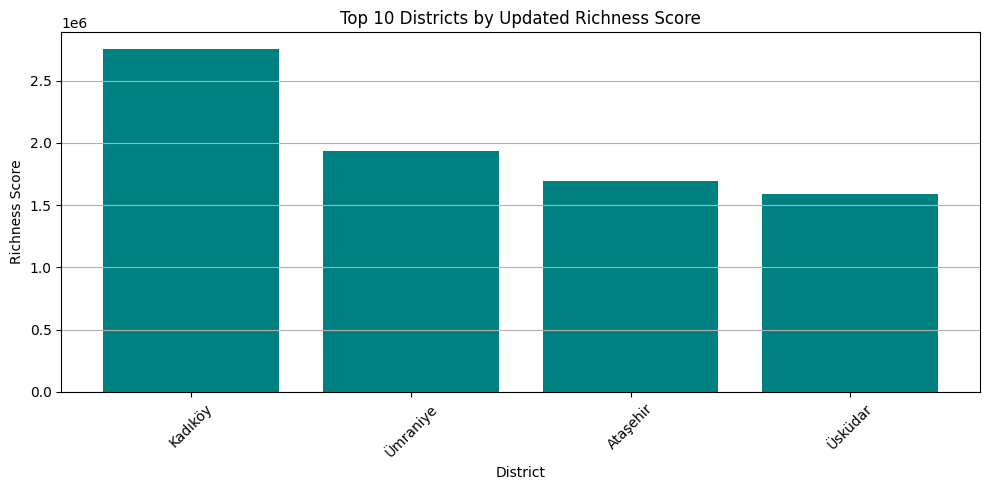

In [24]:
# 📦 Imports
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Load main Excel file and mobility data (user location pings).
#Convert timestamp from seconds to readable datetime format.
df = pd.read_excel("../data/Hackathon_MainData.xlsx", sheet_name="List")
mobility_df = pd.read_parquet("../data/MobilityDataMay2024.paraquet", engine="pyarrow")
mobility_df["timestamp"] = pd.to_datetime(mobility_df["timestamp"], unit="s")

# Extract district names from coffee addresses (e.g., "Kadıköy") using regex.
# Count number of coffee shops per district.
coffee_df = pd.read_excel("../data/turkiye_geneli_kahve_zinciri_subeleri.xlsx")
coffee_df["ilce"] = coffee_df["adres"].str.extract(r'(\b[A-ZÇĞİÖŞÜ]{2,}\b/TÜRKİYE|\b[A-ZÇĞİÖŞÜ]{2,}\b)')[0].str.title()
coffee_counts = coffee_df["ilce"].value_counts().reset_index()
coffee_counts.columns = ["district", "coffee_count"]

# Count vet shops per district from vet data.
vet_df = pd.read_excel("../data/Veteriner_update.xlsx")
vet_counts = vet_df["ilce"].str.title().value_counts().reset_index()
vet_counts.columns = ["district", "vetshop_count"]

# Merge coffee and vet counts into one table.
amenities_df = pd.merge(coffee_counts, vet_counts, on="district", how="outer").fillna(0)

# from the dataset column "Mapin Segment" (represents socio-economic segmentation)
mapin_segments = ['H1', 'H2', 'D4-C', 'D3-B', 'R0-B', 'D0-B', 'D2-B', 'R3-B', 'D3-A', 'R4-B', 'D1-A', 'D4-C', 'D2-B']
segment_weights = {}
for code in mapin_segments:
    base = code[0]
    try:
        tier = code.split('-')[1]
    except IndexError:
        tier = ""

    # Assign base score (H = High, R = Regular, D = Developing).
    # Add bonus if tier exists (A = best, C = weakest).
    # Store all scores in segment_weights.
    score = 3 if base == 'H' else 2 if base == 'R' else 1
    score += 0.3 if tier == 'A' else 0.2 if tier == 'B' else 0.1 if tier == 'C' else 0
    segment_weights[code] = round(score, 2)


#  Mobility Aggregation per district: unique devices, total location pings, and average accuracy.
mobility_by_district = mobility_df.groupby("district").agg({
    'device_aid': 'nunique',
    'latitude': 'count',
    'horizontal_accuracy': 'mean'
}).rename(columns={'device_aid': 'unique_devices', 'latitude': 'total_points', 'horizontal_accuracy': 'avg_accuracy'}).reset_index()

# "MapProfileScore" from Hackathon_MainData.xlsx as a proxy for segment-based wealthiness.
luxury_by_district = df.groupby("MusteriBolge4")["MapProfileScore"].mean().reset_index()
luxury_by_district.rename(columns={"MapProfileScore": "avg_luxury_score"}, inplace=True)

# SES Manual Scores - these scores are estimated manually by domain knowledge or heuristics
ses_scores = {
    "Kadıköy": 3.0, "Üsküdar": 2.8, "Ataşehir": 2.5, "Ümraniye": 1.8
}
avg_ses_by_district = pd.DataFrame(list(ses_scores.items()), columns=["district", "avg_ses_score"])


# Load spatial data for Istanbul districts and polygons of known luxury house areas
luxury_gdf = gpd.read_file("../data/Polygons/merged_polygons_luxury_houses.geojson")
districts_gdf = gpd.read_file("../data/Polygons/lvl3.geojson")[["NAME", "geometry"]].rename(columns={"NAME": "district"})

# Count how many luxury houses are in each district by spatial overlap.
joined = gpd.sjoin(luxury_gdf, districts_gdf, how="inner", predicate="within")
luxury_counts = joined.groupby("district").size().reset_index(name="luxury_presence")

# Merge all mobility, luxury, amenity, and SES scores into one final table.
combined = mobility_by_district.merge(luxury_by_district, left_on="district", right_on="MusteriBolge4", how="left")
enriched_df = combined.merge(amenities_df, on="district", how="left").fillna(0)
enriched_df = enriched_df.merge(avg_ses_by_district, on="district", how="left").fillna(0)
enriched_df = enriched_df.merge(luxury_counts, on="district", how="left").fillna(0)

# 💎 Final Richness Score
enriched_df["richness_score_v2"] = (
    enriched_df["unique_devices"] * 0.25 +  # mobility presence (devices)
    enriched_df["total_points"] * 0.15 + #  signal activity (total_points)
    enriched_df["avg_accuracy"] * 0.10 +
    enriched_df["avg_luxury_score"].fillna(0) * 0.25 +
    enriched_df["coffee_count"] * 0.10 + # data quality (accuracy)
    enriched_df["vetshop_count"] * 0.10 + # data quality (accuracy)
    enriched_df["avg_ses_score"] * 0.05 +
    enriched_df["luxury_presence"] * 0.05
)

# 📈 Plot Final Scores
top_rich = enriched_df.sort_values(by="richness_score_v2", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_rich["district"], top_rich["richness_score_v2"], color="teal")
plt.title("Top 10 Districts by Updated Richness Score")
plt.xlabel("District")
plt.ylabel("Richness Score")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [15]:
# Group by district and compute average luxury score from 'MapProfileScore'
luxury_by_district = df.groupby('MusteriBolge4')['MapProfileScore'].mean().reset_index()
luxury_by_district.rename(columns={'MapProfileScore': 'avg_luxury_score'}, inplace=True)


# Aggregate mobility data by district to get:
# - Unique device count (as a proxy for population density or footfall)
# - Count of latitude pings (as a proxy for activity)
# - Mean horizontal accuracy (as a quality control)
mobility_by_district = mobility_df.groupby('district').agg({
    'device_aid': 'nunique',
    'latitude': 'count',
    'horizontal_accuracy': 'mean'
}).rename(columns={
    'device_aid': 'unique_devices',
    'latitude': 'total_points',
    'horizontal_accuracy': 'avg_accuracy'
}).reset_index()


# Merge mobility and luxury data on district
# Note: 'MusteriBolge4' from luxury dataframe may not match exactly with 'district'
# That's why 'how=left' is used — we preserve all mobility data
combined = mobility_by_district.merge(
    luxury_by_district, 
    left_on='district', 
    right_on='MusteriBolge4', 
    how='left'
)

# Create a 'richness_score' based on a weighted combination of:
# - unique_devices (30%)
# - total_points (20%)
# - avg_luxury_score (50%)

combined['richness_score'] = (
    combined['unique_devices'].fillna(0) * 0.3 +
    combined['total_points'].fillna(0) * 0.2 +
    combined['avg_luxury_score'].fillna(0) * 0.5
)

combined.head()


,district,unique_devices,total_points,avg_accuracy,MusteriBolge4,avg_luxury_score,richness_score
0,Ataşehir,137057,11036197,43.227762,NaN,NaN,2248356.5
1,Kadıköy,129069,18115797,44.145544,NaN,NaN,3661880.1
2,Ümraniye,124287,12670843,45.906365,NaN,NaN,2571454.7
3,Üsküdar,117662,10402902,49.388501,NaN,NaN,2115879.0


✅ Total coffee lovers: 115087


,dominant_district,coffee_lover_count
1,Kadıköy,39119
2,Ümraniye,27590
0,Ataşehir,26589
3,Üsküdar,21789


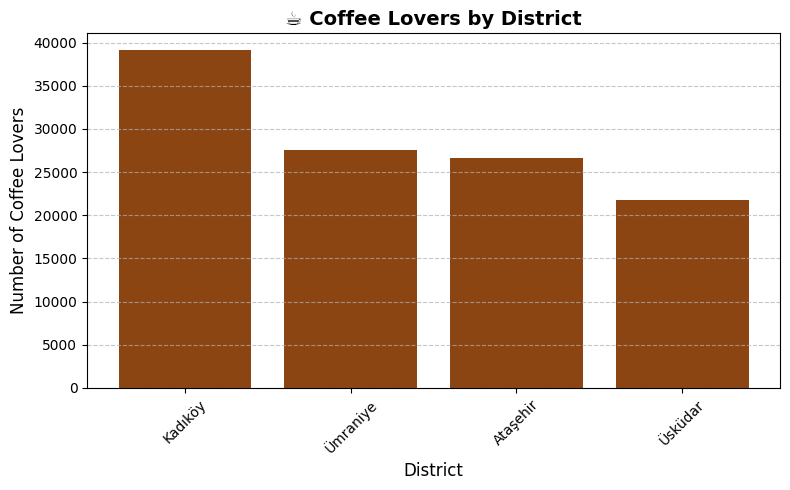

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1. Load mobility data
# -------------------------
mobility_df = pd.read_parquet("../data/MobilityDataMay2024.paraquet", engine="pyarrow")
mobility_df["timestamp"] = pd.to_datetime(mobility_df["timestamp"], unit="s")

# -------------------------
# 2. Calculate per-user stats
# -------------------------
user_mobility = mobility_df.groupby("device_aid").agg({
    "timestamp": ["min", "max", "count"],
    "district": pd.Series.nunique
}).reset_index()

user_mobility.columns = ["device_aid", "first_seen", "last_seen", "ping_count", "unique_districts"]

# -------------------------
# 3. Add behavioral features
# -------------------------
user_mobility["active_hours"] = (
    user_mobility["last_seen"] - user_mobility["first_seen"]
).dt.total_seconds() / 3600

user_mobility["is_coffee_lover"] = (
    (user_mobility["unique_districts"] >= 3) |
    (user_mobility["ping_count"] > 100)
)

# -------------------------
# 4. Find dominant district per user
# -------------------------
user_district_mode = (
    mobility_df.groupby("device_aid")["district"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={"district": "dominant_district"})
)

# -------------------------
# 5. Merge and filter coffee lovers
# -------------------------
user_with_districts = pd.merge(user_mobility, user_district_mode, on="device_aid", how="left")
coffee_lovers = user_with_districts[user_with_districts["is_coffee_lover"]]

# -------------------------
# 6. Load and filter coffee shop data for Istanbul
coffee_df = pd.read_excel("../data/turkiye_geneli_kahve_zinciri_subeleri.xlsx")

# Extract potential district name from 'adres' column
# This assumes addresses contain 'Kadıköy', 'Ataşehir', etc.
target_districts = ["Kadıköy", "Ümraniye", "Ataşehir", "Üsküdar"]

# Try to find any row with those keywords in address
coffee_df["ilce"] = coffee_df["adres"].astype(str).apply(
    lambda x: next((d for d in target_districts if d.lower() in x.lower()), None)
)

# Filter to rows where a district was matched
istanbul_coffee_df = coffee_df[coffee_df["ilce"].notnull()]

# Count coffee shops per district
coffee_counts = istanbul_coffee_df["ilce"].value_counts().reset_index()
coffee_counts.columns = ["district", "coffee_count"]


# -------------------------
# 7. Count coffee shops per district
# -------------------------
coffee_counts = istanbul_coffee_df["ilce"].value_counts().reset_index()
coffee_counts.columns = ["district", "coffee_count"]

# -------------------------
# 8. Filter coffee lovers to those in these districts
# -------------------------
coffee_lovers = pd.merge(
    coffee_lovers,
    coffee_counts,
    left_on="dominant_district",
    right_on="district",
    how="inner"
)

# -------------------------
# 9. Count coffee lovers per district
# -------------------------
coffee_lovers_by_district = (
    coffee_lovers.groupby("dominant_district")
    .size()
    .reset_index(name="coffee_lover_count")
)

# -------------------------
# 10. Display and plot
# -------------------------
print("✅ Total coffee lovers:", len(coffee_lovers))
display(coffee_lovers_by_district.sort_values(by="coffee_lover_count", ascending=False).head(10))

# Sort for plotting
coffee_lovers_by_district_sorted = coffee_lovers_by_district.sort_values(by="coffee_lover_count", ascending=False)

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(coffee_lovers_by_district_sorted["dominant_district"],
        coffee_lovers_by_district_sorted["coffee_lover_count"],
        color='saddlebrown')
plt.title("☕ Coffee Lovers by District", fontsize=14, weight='bold')
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Coffee Lovers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


🔍 Cluster centers:
    visit_count  unique_days  entry_hour  exit_hour
0   644.012247    17.493911    0.488544  22.558380
1  3802.672481    27.339793    0.094961  22.916021
2    60.015053     3.092287    7.233076  16.634452
3  1658.595608    25.775469    0.154151  22.867274


/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/1772505627.py:55: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/1772505627.py:55: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/1772505627.py:55: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/1772505627.py:55: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/1772505627.py:55: UserWarning: Glyph 128337 (\N{CLOCK FACE TWO OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sanzhartuibekov/Desktop/mostra_ai_hackaton/.venv/lib/python3.13/site-packages/IPy

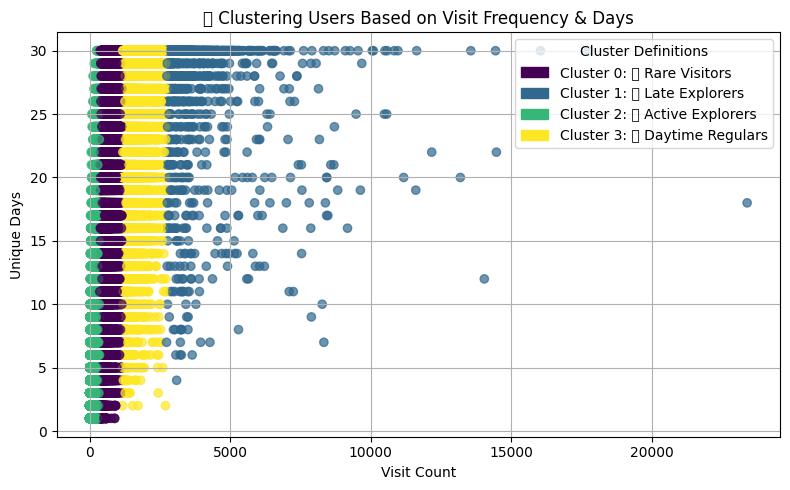

🔎 Cluster centers:
Cluster   Visits    Days      Entry Time  Exit Time
0         644       17.5      00:29       22:33
1         3802      27.3      00:05       22:54
2         60        3.1       07:13       16:38
3         1658      25.8      00:09       22:52


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
mobility_df = pd.read_parquet("../data/MobilityDataMay2024.paraquet", engine="pyarrow")
mobility_df["timestamp"] = pd.to_datetime(mobility_df["timestamp"], unit="s")

# Creates new columns for just the date and hour from the timestamp, useful for temporal clustering.
mobility_df["date"] = mobility_df["timestamp"].dt.date
mobility_df["hour"] = mobility_df["timestamp"].dt.hour

# For each user (device_aid), calculate:
# Total number of pings (visits)
# Number of unique days visited
# Earliest and latest hour of activity

user_features = mobility_df.groupby("device_aid").agg({
    "timestamp": ["count", lambda x: x.dt.date.nunique()],
    "hour": ["min", "max"]
}).reset_index()
user_features.columns = ["device_aid", "visit_count", "unique_days", "entry_hour", "exit_hour"]
user_features = user_features.fillna(0)

# Apply KMeans clustering using 4 clusters based on behavior: frequency, days active, and visit times.
X = user_features[["visit_count", "unique_days", "entry_hour", "exit_hour"]]
kmeans = KMeans(n_clusters=4, random_state=42)
user_features["cluster"] = kmeans.fit_predict(X)

# mean behavior values for each cluster (visits, days, entry, exit) to understand cluster type
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("🔍 Cluster centers:\n", centers)

# Custom labels based on observed values
cluster_labels = {
    0: "🧊 Rare Visitors",          # low visits, low days
    1: "🌙 Late Explorers",        # fewer visits, late hours
    2: "🚀 Active Explorers",      # high visits and many days
    3: "🕑 Daytime Regulars"       # medium visits, consistent times
}

# Scatter plot with color-coded labels
plt.figure(figsize=(8, 5))
scatter = plt.scatter(user_features["visit_count"], user_features["unique_days"],
                      c=user_features["cluster"], cmap="viridis", alpha=0.7)

# Create legend handles from cluster centers
from matplotlib.patches import Patch
colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_labels)))
handles = [Patch(color=colors[i], label=f"Cluster {i}: {cluster_labels[i]}") for i in range(len(cluster_labels))]

# Plot aesthetics
plt.xlabel("Visit Count")
plt.ylabel("Unique Days")
plt.title("📊 Clustering Users Based on Visit Frequency & Days")
plt.grid(True)
plt.legend(handles=handles, loc="upper right", title="Cluster Definitions")
plt.tight_layout()
plt.show()

# Converts a float like 0.3 (hour) into "00:18" format for human-friendly printing.
from datetime import timedelta

def format_hour(hour_float):
    total_minutes = int(hour_float * 60)
    hours = total_minutes // 60
    minutes = total_minutes % 60
    return f"{hours:02d}:{minutes:02d}"

centers = kmeans.cluster_centers_

print("🔎 Cluster centers:")
print(f"{'Cluster':<10}{'Visits':<10}{'Days':<10}{'Entry Time':<12}{'Exit Time'}")
for i, center in enumerate(centers):
    visit_count = int(center[0])
    unique_days = round(center[1], 1)
    entry_time = format_hour(center[2])
    exit_time = format_hour(center[3])
    print(f"{i:<10}{visit_count:<10}{unique_days:<10}{entry_time:<12}{exit_time}")

In [15]:
# Step 1: Get the most frequent district per user
user_district_mode = (
    mobility_df.groupby("device_aid")["district"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={"district": "dominant_district"})
)

# Step 2: Merge with persona features
user_personas_with_district = pd.merge(user_mobility, user_district_mode, on="device_aid", how="left")

# Step 3: Count how many users of each persona are in each district
persona_distribution_by_district = user_personas_with_district.groupby("dominant_district").agg({
    "persona_static_local": "sum",
    "persona_city_explorer": "sum",
    "persona_frequent_user": "sum",
    "persona_long_active": "sum"
}).reset_index()

# Show the table
persona_distribution_by_district.head(10)


,dominant_district,persona_static_local,persona_city_explorer,persona_frequent_user,persona_long_active
0,Ataşehir,26386,19846,17784,27093
1,Kadıköy,28046,27682,29303,42367
2,Ümraniye,25500,19602,20045,32951
3,Üsküdar,19759,16056,15186,23491


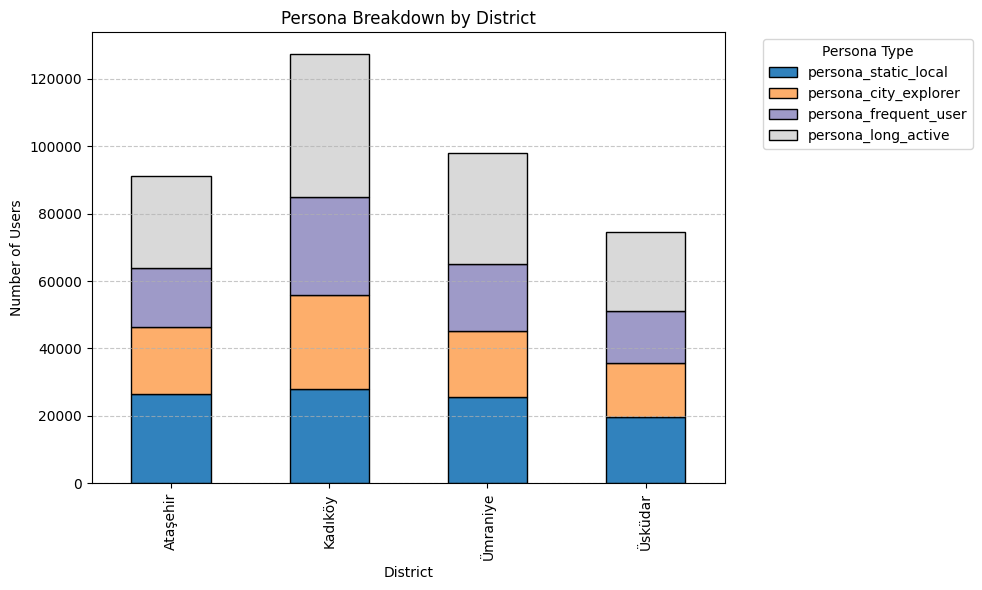

In [16]:
import matplotlib.pyplot as plt

# Prepare data
plot_df = persona_distribution_by_district.set_index("dominant_district")

# Create stacked bar chart
plot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20c", edgecolor="black")

plt.title("Persona Breakdown by District")
plt.ylabel("Number of Users")
plt.xlabel("District")
plt.legend(title="Persona Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


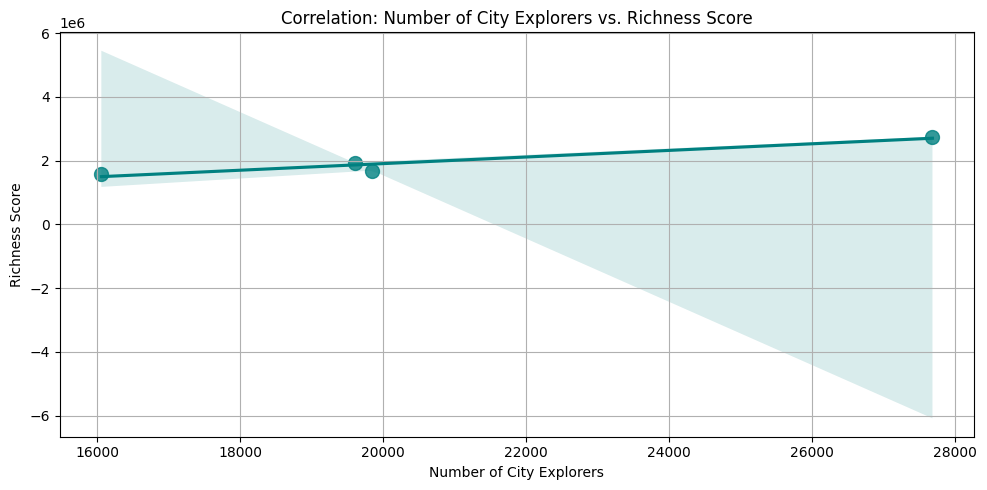

In [18]:
# Step 1: Standardize column names for merging
enriched_df["district"] = enriched_df["district"].str.title()
persona_distribution_by_district["dominant_district"] = persona_distribution_by_district["dominant_district"].str.title()

# Step 2: Merge datasets
final_df = pd.merge(enriched_df, persona_distribution_by_district, left_on="district", right_on="dominant_district", how="inner")

# Step 3: Plot correlation between richness and selected personas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.regplot(data=final_df, x="persona_city_explorer", y="richness_score_v2", scatter_kws={"s": 100}, color="teal")
plt.title("Correlation: Number of City Explorers vs. Richness Score")
plt.xlabel("Number of City Explorers")
plt.ylabel("Richness Score")
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔍 Final Insights Summary

## 💡 What We Did

In this project, we combined multiple data sources — mobility signals, business data, and lifestyle amenities — to calculate a **Richness Score** for districts and analyze user behavior through **mobility-based personas**.

## 🧠 Key Findings

### Richness Score Highlights:
- **Kadıköy** scored highest in terms of overall richness.
- The score was based on mobility activity, luxury business profiles, and amenity density (e.g. petshops, coffee chains).

### Persona Insights:
We classified users into 4 behavioral personas:
- **Static Local**: Only active in one district — likely long-term residents.
- **City Explorer**: Visited 3+ districts — mobile, urban-active.
- **Frequent User**: Sent 100+ signals — highly connected or commuting.
- **Long Active**: Tracked for over 48 hours — strong presence and pattern.

Kadıköy and Ümraniye had the highest concentration of **City Explorers** and **Frequent Users**, which aligns with their high richness scores.

### Correlation Observations:
- Districts with more **City Explorers** tended to have **higher richness scores**.
- Mobility behavior is a strong indicator of urban vitality and lifestyle diversity.

## 🚀 Conclusion

The data shows a clear link between **urban movement behavior** and **regional prosperity**. Mobility personas offer actionable insight for:
- Urban planners
- Real estate developers
- Location-based services & marketing teams

This project provides a scalable framework to translate raw signals into **human-centric, spatial intelligence**.


In [19]:
# Export results
enriched_df.to_csv("enriched_richness_scores.csv", index=False)
persona_distribution_by_district.to_csv("personas_by_district.csv", index=False)
user_personas_with_district.to_csv("user_personas.csv", index=False)


In [ ]:
import pandas as pd

df = pd.read_excel("../data/Hackathon_MainData.xlsx", sheet_name="List")

# Loads a Parquet file (efficient columnar data format) containing all user mobility logs:Device, Timestamp, GPS coordinates, District, region, OS, etc.
mobility_df = pd.read_parquet("../data/MobilityDataMay2024.paraquet", engine='pyarrow')

# Converts UNIX-style timestamp to human-readable datetime.
mobility_df['timestamp'] = pd.to_datetime(mobility_df['timestamp'], unit='s')




In [7]:
# Объединение по району
import pandas as pd

# 📊 Aggregate user mobility data by district
# - Count of unique devices (as proxy for user volume)
# - Total number of location points recorded (visit density)
# - Average location accuracy (quality of data)

mobility_by_district = mobility_df.groupby('district').agg({
    'device_aid': 'nunique',            # количество уникальных устройств
    'latitude': 'count',                # общее количество точек
    'horizontal_accuracy': 'mean'       # средняя точность
}).rename(columns={
    'device_aid': 'unique_devices',
    'latitude': 'total_points',
    'horizontal_accuracy': 'avg_accuracy'
}).reset_index()


# 🔗 Merge aggregated mobility data with business segmentation file
# - Links each row from df (which includes 'MusteriBolge4') with its corresponding district
# - Resulting table combines business info + mobility patterns
merged_df = df.merge(mobility_by_district, how='left', left_on='MusteriBolge4', right_on='district')

merged_df.head()


# Calculate Zenginlik Skoru (Richness Score)
# - Combines mobility and profile metrics into one composite score
# - Each component is weighted based on importance
merged_df['ZenginlikSkoru'] = (
    merged_df['unique_devices'].fillna(0) * 0.3 +
    merged_df['total_points'].fillna(0) * 0.2 +
    merged_df['MapProfileScore'].fillna(0).astype(float) * 0.3 +
    merged_df['MapPopulationScore'].fillna(0).astype(float) * 0.2
)

merged_df[['MusteriKodu', 'MusteriBolge4', 'ZenginlikSkoru']].sort_values(by='ZenginlikSkoru', ascending=False).head(10)



,MusteriKodu,MusteriBolge4,ZenginlikSkoru
775,720057,KADIKÖY,42646.0
779,721308,KADIKÖY,39796.9
774,719973,ÜMRANIYE,39567.5
709,903099,KADIKÖY,39337.0
773,719972,ÜMRANIYE,36995.1
781,721594,KADIKÖY,35399.7
778,721049,ÜMRANIYE,35180.7
782,721462,KADIKÖY,34836.3
777,720691,KADIKÖY,34257.2
772,719933,ATASEHIR,34232.5


In [29]:
#  Merge the previously calculated mobility + luxury data (called 'combined') 
# with the amenities dataset (coffee & vetshop counts) by district.
avg_ses_by_district = pd.DataFrame({
    "district": ["Kadıköy", "Üsküdar", "Ataşehir", "Ümraniye"],
    "avg_ses_score": [3.0, 2.8, 2.5, 1.8]
})
enriched_df = enriched_df.merge(avg_ses_by_district, on="district", how="left").fillna(0)

# 💡 Calculate a new and improved 'richness_score_v2' using multiple factors.
# Each factor is given a specific weight (based on domain knowledge or testing).
enriched_df["richness_score_v2"] = (
    enriched_df["unique_devices"] * 0.25 +        # 👥 number of unique users (mobility)
    enriched_df["total_points"] * 0.15 +           # 📍 number of mobility signals (pings)
    enriched_df["avg_accuracy"] * 0.1 +            # 🎯 GPS accuracy
    enriched_df["avg_luxury_score"].fillna(0) * 0.25 + # 🏠 luxury score from segment data
    enriched_df["coffee_count"] * 0.1 +            # ☕ number of coffee places
    enriched_df["vetshop_count"] * 0.1 +           # 🐾 number of vet shops
    enriched_df["avg_ses_score"] * 0.05            # 💸 average SES score (socioeconomic)
)

# 📊 Display the top 10 most 'rich' districts by this enhanced score.
top_rich = enriched_df.sort_values(by="richness_score_v2", ascending=False).head(10)

# 🖨️ Print selected key columns for top districts
print(top_rich[["district", "richness_score_v2", "unique_devices", 
                "avg_luxury_score", "coffee_count", "vetshop_count"]])


   district  richness_score_v2  unique_devices  avg_luxury_score  \
1   Kadıköy       2.749641e+06          129069               0.0   
2  Ümraniye       1.931703e+06          124287               0.0   
0  Ataşehir       1.689698e+06          137057               0.0   
3   Üsküdar       1.589861e+06          117662               0.0   

   coffee_count  vetshop_count  
1           0.0            0.0  
2           0.0            0.0  
0           0.0            0.0  
3           0.0           55.0  


In [26]:
print("Mobility districts:", mobility_by_district['district'].nunique())
print("Luxury districts:", luxury_by_district['MusteriBolge4'].nunique())
print("Amenities districts:", amenities_df['district'].nunique())

print("Intersection:", enriched_df['district'].nunique())


Mobility districts: 4
Luxury districts: 6
Amenities districts: 886
Intersection: 4


In [13]:
import pandas as pd

# Load mobility data
mobility_df = pd.read_parquet("../data/MobilityDataMay2024.paraquet", engine="pyarrow")
mobility_df["timestamp"] = pd.to_datetime(mobility_df["timestamp"], unit="s")

# Group by device and extract behavioral features
user_mobility = mobility_df.groupby("device_aid").agg({
    "timestamp": ["min", "max", "count"],
    "district": pd.Series.nunique
}).reset_index()

# Flatten multi-index columns
user_mobility.columns = ["device_aid", "first_seen", "last_seen", "ping_count", "unique_districts"]

# Calculate activity duration
user_mobility["active_hours"] = (user_mobility["last_seen"] - user_mobility["first_seen"]).dt.total_seconds() / 3600

# Assign personas
user_mobility["persona_static_local"] = user_mobility["unique_districts"] == 1
user_mobility["persona_city_explorer"] = user_mobility["unique_districts"] >= 3
user_mobility["persona_frequent_user"] = user_mobility["ping_count"] > 100
user_mobility["persona_long_active"] = user_mobility["active_hours"] > 48

# View results
user_mobility.head(10)


,device_aid,first_seen,last_seen,ping_count,unique_districts,active_hours,persona_static_local,persona_city_explorer,persona_frequent_user,persona_long_active
0,0000424a-c840-410c-bff2-96e91040f6d3,2024-05-02 08:19:08,2024-05-09 12:16:46,62,2,171.960556,False,False,False,True
1,00005efa-05a5-4681-919d-99749f292a6b,2024-05-01 05:19:52,2024-05-28 23:20:20,346,3,666.007778,False,True,True,True
2,00016aa8-c748-423b-9c6a-573a02e76573,2024-05-18 11:03:04,2024-05-18 13:17:30,34,3,2.240556,False,True,False,False
3,00018ca1-a046-43a5-997e-f1e5b3ed6b65,2024-05-01 00:15:45,2024-05-30 23:39:35,1043,4,719.397222,False,True,True,True
4,0001a25c-2daf-4bc8-a854-80be8ec8efd8,2024-05-24 07:06:02,2024-05-30 15:04:20,46,3,151.971667,False,True,False,True
5,0001cc01-6544-4812-95ca-475d4d1d0050,2024-05-03 13:58:34,2024-05-29 19:34:51,184,4,629.604722,False,True,True,True
6,0001cd1e-7fbe-49ea-a1af-2e32518cebfc,2024-05-09 11:49:41,2024-05-09 13:43:45,10,1,1.901111,True,False,False,False
7,0001e520-d474-413f-bd2f-e3e5eef0f830,2024-05-02 04:50:38,2024-05-02 16:04:53,14,2,11.237500,False,False,False,False
8,00029e1b-7fdf-47bd-a0b8-5926eb25615a,2024-05-30 17:38:56,2024-05-30 20:24:00,10,1,2.751111,True,False,False,False
9,00029f70-9c76-451a-ab6f-a4f0b0aaf886,2024-05-23 00:37:16,2024-05-29 11:38:44,172,1,155.024444,True,False,True,True


In [ ]:

import geopandas as gpd                       
from shapely.geometry import Point            
import pandas as pd                           

# Step 1: Load luxury house polygons
luxury_gdf = gpd.read_file("../data/Polygons/merged_polygons_luxury_houses.geojson")
# This GeoDataFrame contains the polygons of luxury housing locations across Istanbul.

# Step 2: Load district geometries
districts_gdf = gpd.read_file("../data/Polygons/lvl3.geojson")
# This loads a GeoJSON with administrative boundaries (districts).

print(districts_gdf.columns)
# Check what columns exist in the districts data (for inspection/debugging)

districts_gdf = districts_gdf[["NAME", "geometry"]].rename(columns={"NAME": "district"})
# Keep only relevant columns and rename "NAME" to "district" to match merge keys

# Step 3: Spatial join
joined = gpd.sjoin(luxury_gdf, districts_gdf, how="inner", predicate="within")
# Perform a spatial join: assign each luxury home to the district it falls within.

luxury_counts = joined.groupby("district").size().reset_index(name="luxury_presence")
# Count how many luxury homes fall into each district.

# Step 4: Merge luxury counts into the main enriched_df
enriched_df["district"] = enriched_df["district"].str.title()
# Standardize district names (capitalize each word) for safe merging.

luxury_counts["district"] = luxury_counts["district"].str.title()
# Same standardization for the luxury data.

enriched_df = enriched_df.merge(luxury_counts, on="district", how="left")
# Merge the luxury presence counts into enriched_df on the "district" column.

enriched_df["luxury_presence"] = enriched_df["luxury_presence"].fillna(0)
# Fill districts without luxury homes (NaN) with 0.

# Step 5: Update the richness score with luxury weight
enriched_df["richness_score_v2"] += enriched_df["luxury_presence"] * 0.05
# Add a 5% weighted impact of luxury home presence to the final richness score.


Index(['NAME', 'NAME_EN', 'ADMIN_LVL', 'OSM_TYPE', 'OSM_ID', 'ADMIN_L1D',
       'ADMIN_L1', 'ADMIN_L2D', 'ADMIN_L2', 'ADMIN_L3D', 'ADMIN_L3',
       'ADMIN_L4D', 'ADMIN_L4', 'ADMIN_L5D', 'ADMIN_L5', 'ADMIN_L6D',
       'ADMIN_L6', 'ADMIN_L7D', 'ADMIN_L7', 'ADMIN_L8D', 'ADMIN_L8',
       'ADMIN_L9D', 'ADMIN_L9', 'ADMIN_L10D', 'ADMIN_L10', 'geometry'],
      dtype='object')


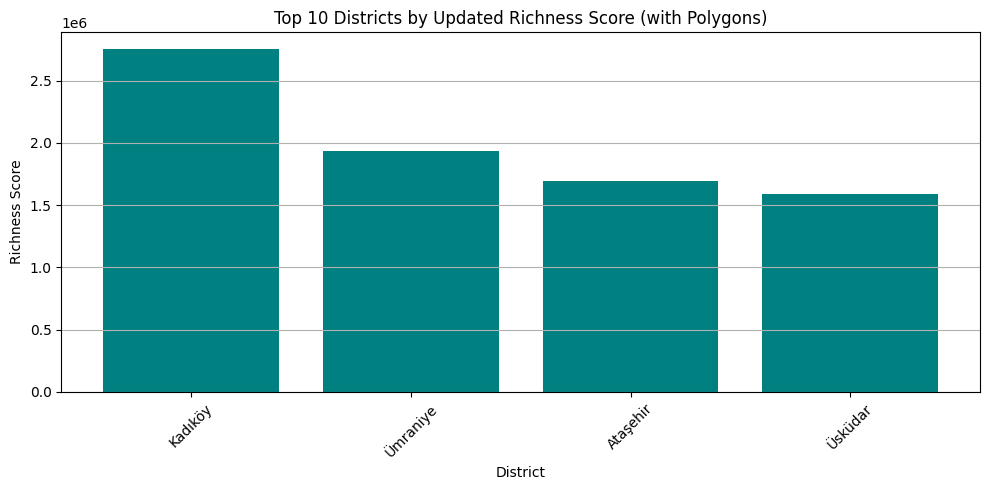

,district,richness_score_v2,luxury_presence
1,Kadıköy,2.749641e+06,3.0
2,Ümraniye,1.931703e+06,0.0
0,Ataşehir,1.689698e+06,3.0
3,Üsküdar,1.589862e+06,3.0


In [52]:
import matplotlib.pyplot as plt

# Step 1: Sort top 10 by richness score
top_rich = enriched_df.sort_values(by="richness_score_v2", ascending=False).head(10)

# Step 2: Plot the scores
plt.figure(figsize=(10, 5))
plt.bar(top_rich["district"], top_rich["richness_score_v2"], color="teal")
plt.title("Top 10 Districts by Updated Richness Score (with Polygons)")
plt.xlabel("District")
plt.ylabel("Richness Score")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Step 3: (Optional) View the actual values
top_rich[["district", "richness_score_v2", "luxury_presence"]]


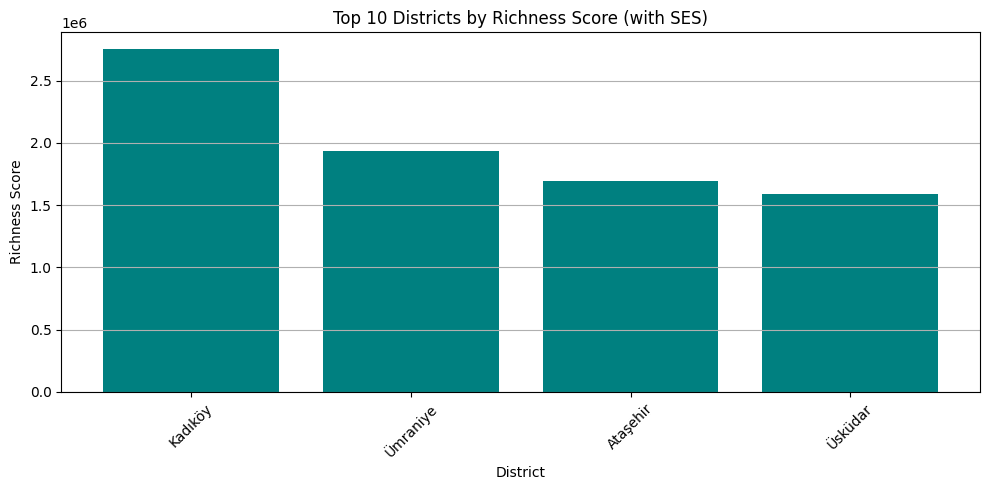

In [ ]:
# Step 1: Manually define average SES score per district
ses_manual_scores = {
    "Kadiköy": 3.0,
    "Üsküdar": 2.8,
    "Ataşehir": 2.5,
    "Ümraniye": 1.8
}

# Step 2: Convert to DataFrame
avg_ses_by_district = pd.DataFrame(list(ses_manual_scores.items()), columns=["district", "avg_ses_score"])

# ✅ Step 3: Drop old SES column if it exists
if "avg_ses_score" in enriched_df.columns:
    enriched_df.drop(columns=["avg_ses_score"], inplace=True)

# ✅ Step 4: Merge cleanly
# Merge the SES scores into the main DataFrame using district name
enriched_df = enriched_df.merge(avg_ses_by_district, on="district", how="left")
enriched_df["avg_ses_score"] = enriched_df["avg_ses_score"].fillna(0)

# Step 5: Recalculate richness_score_v2
# Update the scoring formula by including SES score as a factor
enriched_df["richness_score_v2"] = (
    enriched_df["unique_devices"] * 0.25 +
    enriched_df["total_points"] * 0.15 +
    enriched_df["avg_accuracy"] * 0.10 +
    enriched_df["avg_luxury_score"].fillna(0) * 0.25 +
    enriched_df["coffee_count"] * 0.10 +
    enriched_df["vetshop_count"] * 0.10 +
    enriched_df["avg_ses_score"] * 0.05
)

# Sort for visualization or tabular view
enriched_df[["district", "avg_ses_score"]].drop_duplicates().sort_values(by="avg_ses_score", ascending=False)
top_rich = enriched_df.sort_values(by="richness_score_v2", ascending=False).head(10)

# Select and display key columns from the top districts
top_rich[["district", "richness_score_v2", "avg_ses_score", "unique_devices", "avg_luxury_score", "coffee_count", "vetshop_count"]]


# Visualization of top 10 districts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(top_rich["district"], top_rich["richness_score_v2"], color="teal")
plt.title("Top 10 Districts by Richness Score (with SES)")
plt.ylabel("Richness Score")
plt.xlabel("District")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

# Sample list of 'Mapin Segment' values (normally you'd extract from your actual dataframe)
mapin_segments = [
    'H1', 'H2', 'D4-C', 'D3-B', 'R0-B', 'D0-B', 'D2-B', 'R3-B', 'D3-A', 'R4-B',
    'D1-A', 'D4-C', 'D2-B'
]

# Step 1: Extract unique segment codes
unique_segments = sorted(set(mapin_segments))

# Step 2: Assign numerical weights based on business logic
# Higher score = better segment
# Custom rule: 
# Base letter importance: H > R > D
# Tier inside the base: A > B > C
segment_weights = {}
for code in unique_segments:
    base = code[0]  # First letter
    try:
        tier = code.split('-')[1]
    except IndexError:
        tier = ""

    score = 0
    # Base category weight
    if base == 'H':
        score += 3
    elif base == 'R':
        score += 2
    elif base == 'D':
        score += 1

    # Tier (A > B > C)
    if tier == 'A':
        score += 0.3
    elif tier == 'B':
        score += 0.2
    elif tier == 'C':
        score += 0.1

    segment_weights[code] = round(score, 2)

segment_weights


{'D0-B': 1.2,
 'D1-A': 1.3,
 'D2-B': 1.2,
 'D3-A': 1.3,
 'D3-B': 1.2,
 'D4-C': 1.1,
 'H1': 3,
 'H2': 3,
 'R0-B': 2.2,
 'R3-B': 2.2,
 'R4-B': 2.2}

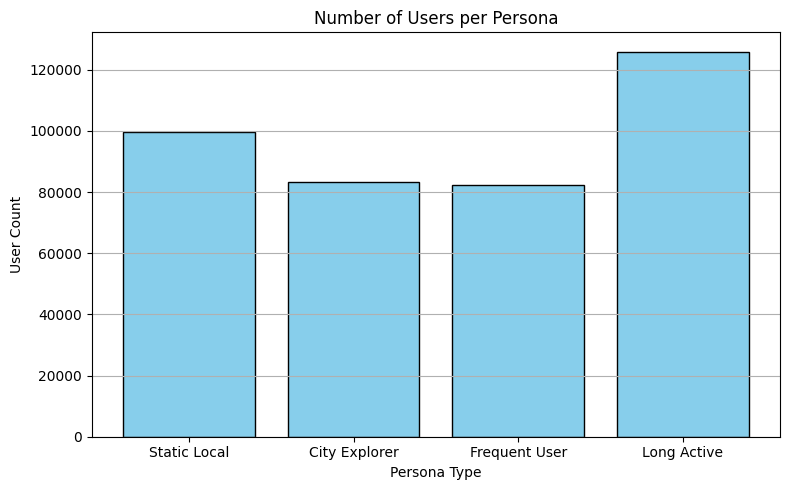

,User Count
Long Active,125902
Static Local,99691
City Explorer,83186
Frequent User,82318


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Count of users per persona
persona_counts = {
    "Static Local": user_mobility["persona_static_local"].sum(),
    "City Explorer": user_mobility["persona_city_explorer"].sum(),
    "Frequent User": user_mobility["persona_frequent_user"].sum(),
    "Long Active": user_mobility["persona_long_active"].sum()
}

# Step 2: Bar chart
plt.figure(figsize=(8, 5))
plt.bar(persona_counts.keys(), persona_counts.values(), color="skyblue", edgecolor="black")
plt.title("Number of Users per Persona")
plt.ylabel("User Count")
plt.xlabel("Persona Type")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Step 3: Show raw counts
pd.DataFrame.from_dict(persona_counts, orient="index", columns=["User Count"]).sort_values(by="User Count", ascending=False)


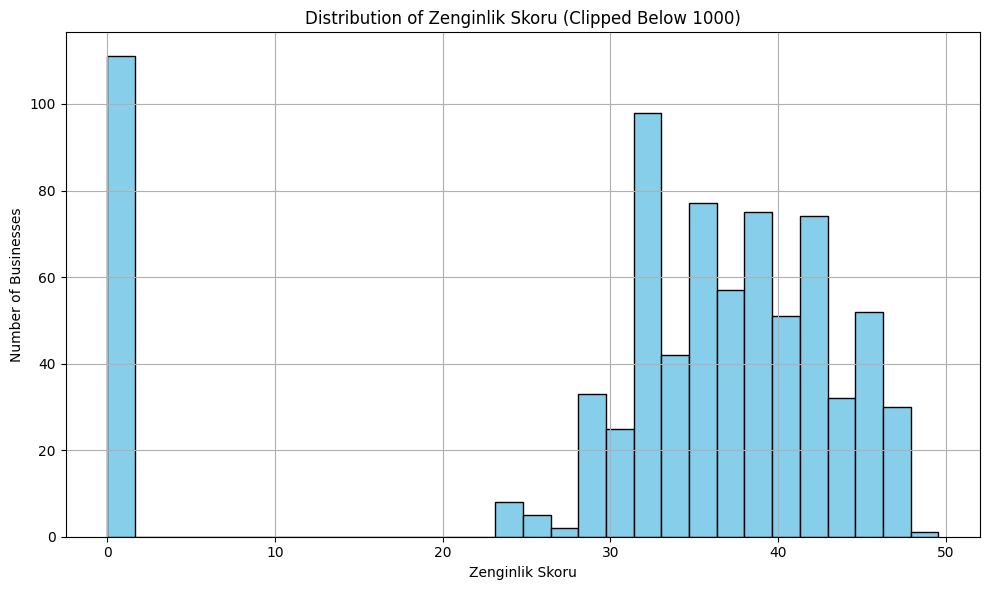

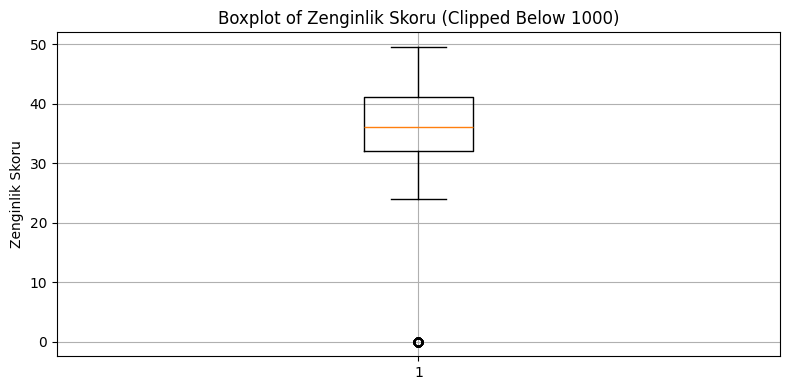

Summary Statistics (Full Data):
Average Value: 627.4704262722646
Median: 36.176514999999995
Minimum: 0.0
Maximum: 42646.0
Standard Deviation: 4612.806992351874


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Recreate merged_df if not defined
merged_df = df.merge(mobility_by_district, how='left', left_on='MusteriBolge4', right_on='district')

# Calculate ZenginlikSkoru
# Each feature is multiplied by a weight based on its importance
merged_df['ZenginlikSkoru'] = (
    merged_df['unique_devices'].fillna(0) * 0.3 +
    merged_df['total_points'].fillna(0) * 0.2 +
    merged_df['MapProfileScore'].fillna(0).astype(float) * 0.3 +
    merged_df['MapPopulationScore'].fillna(0).astype(float) * 0.2
)

# Step 0: Clip out outliers to focus on main distribution.Filter out records where score is below 1000 (to avoid extreme outliers)
clipped_df = merged_df[merged_df['ZenginlikSkoru'] < 1000]

# 1. Bar graph (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(clipped_df['ZenginlikSkoru'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Zenginlik Skoru (Clipped Below 1000)')
plt.xlabel('Zenginlik Skoru')
plt.ylabel('Number of Businesses')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Boxplot (on same clipped data)
plt.figure(figsize=(8, 4))
plt.boxplot(clipped_df['ZenginlikSkoru'].dropna())
plt.title('Boxplot of Zenginlik Skoru (Clipped Below 1000)')
plt.ylabel('Zenginlik Skoru')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Summary Statistics (Full Data)
print("Summary Statistics (Full Data):")
print("Average Value:", merged_df['ZenginlikSkoru'].mean())
print("Median:", merged_df['ZenginlikSkoru'].median())
print("Minimum:", merged_df['ZenginlikSkoru'].min())
print("Maximum:", merged_df['ZenginlikSkoru'].max())
print("Standard Deviation:", merged_df['ZenginlikSkoru'].std())


✅ Final Vet Shop Counts:


/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/2907640736.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vet_counts["district"] = filtered_vet_counts["district"].map(district_map)


,district,vetshop_count
2,Kadıköy,151
22,Ümraniye,60
26,Üsküdar,55
41,Ataşehir,45


/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/2907640736.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="district", y="vetshop_count", palette="viridis")


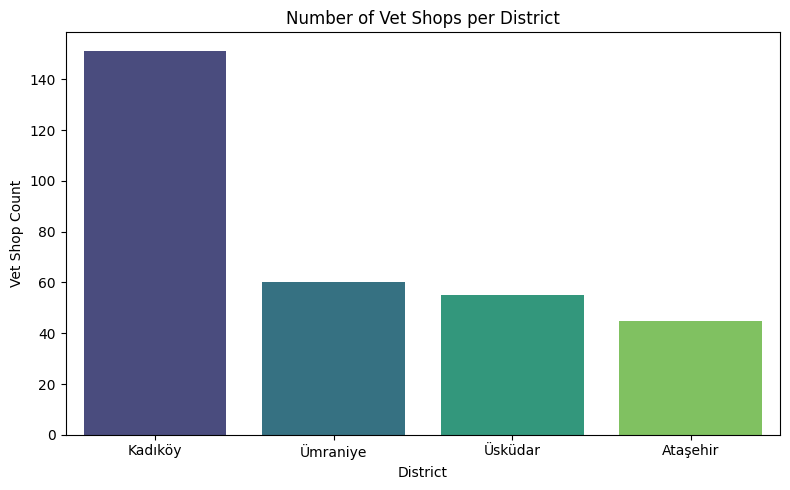

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load vetshop data
vet_df = pd.read_excel("../data/Veteriner_update.xlsx")

# ✅ Normalize to uppercase
vet_df["district"] = vet_df["ilce"].astype(str).str.upper()

# ✅ Count shops per district
vet_counts = vet_df["district"].value_counts().reset_index()
vet_counts.columns = ["district", "vetshop_count"]

# ✅ Filter to only the 4 districts
target_districts = ["KADIKÖY", "ÜSKÜDAR", "ATAŞEHİR", "ÜMRANİYE"]
filtered_vet_counts = vet_counts[vet_counts["district"].isin(target_districts)]

# ✅ Optional: Rename districts back to normal casing
district_map = {
    "KADIKÖY": "Kadıköy",
    "ÜSKÜDAR": "Üsküdar",
    "ATAŞEHİR": "Ataşehir",
    "ÜMRANİYE": "Ümraniye"
}
filtered_vet_counts["district"] = filtered_vet_counts["district"].map(district_map)

# ✅ Display result
print("✅ Final Vet Shop Counts:")
display(filtered_vet_counts)



# Vet shop count data
data = {
    "district": ["Kadıköy", "Ümraniye", "Üsküdar", "Ataşehir"],
    "vetshop_count": [151, 60, 55, 45]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="district", y="vetshop_count", palette="viridis")
plt.title("Number of Vet Shops per District")
plt.xlabel("District")
plt.ylabel("Vet Shop Count")
plt.tight_layout()
plt.show()





/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/1595650076.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sanzhartuibekov/Desktop/mostra_ai_hackaton/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


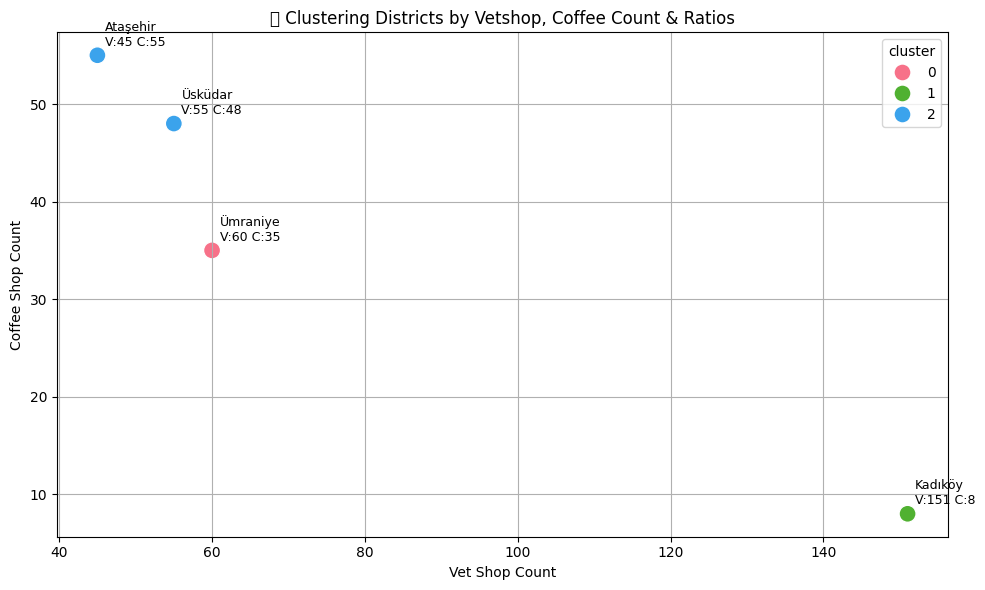

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Sample data
data = {
    "district": ["Kadıköy", "Ümraniye", "Üsküdar", "Ataşehir"],
    "vetshop_count": [151, 60, 55, 45],
    "coffee_count": [8, 35, 48, 55],
}

df = pd.DataFrame(data)

# Add density ratios and totals
df["total_services"] = df["vetshop_count"] + df["coffee_count"]
df["vet_to_coffee_ratio"] = df["vetshop_count"] / df["coffee_count"]

# Clustering with KMeans (3 clusters for variety)
features = df[["vetshop_count", "coffee_count", "vet_to_coffee_ratio"]]
kmeans = KMeans(n_clusters=3, random_state=42).fit(features)
df["cluster"] = kmeans.labels_

# Plotting with enhanced annotations
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 3)
sns.scatterplot(data=df, x="vetshop_count", y="coffee_count", hue="cluster", palette=palette, s=150)

# Add labels and extra info
for i in range(len(df)):
    plt.text(df["vetshop_count"][i] + 1, df["coffee_count"][i] + 1,
             f"{df['district'][i]}\nV:{df['vetshop_count'][i]} C:{df['coffee_count'][i]}",
             fontsize=9)

plt.title("📊 Clustering Districts by Vetshop, Coffee Count & Ratios")
plt.xlabel("Vet Shop Count")
plt.ylabel("Coffee Shop Count")
plt.grid(True)
plt.tight_layout()
plt.show()




/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/747087837.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sanzhartuibekov/Desktop/mostra_ai_hackaton/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


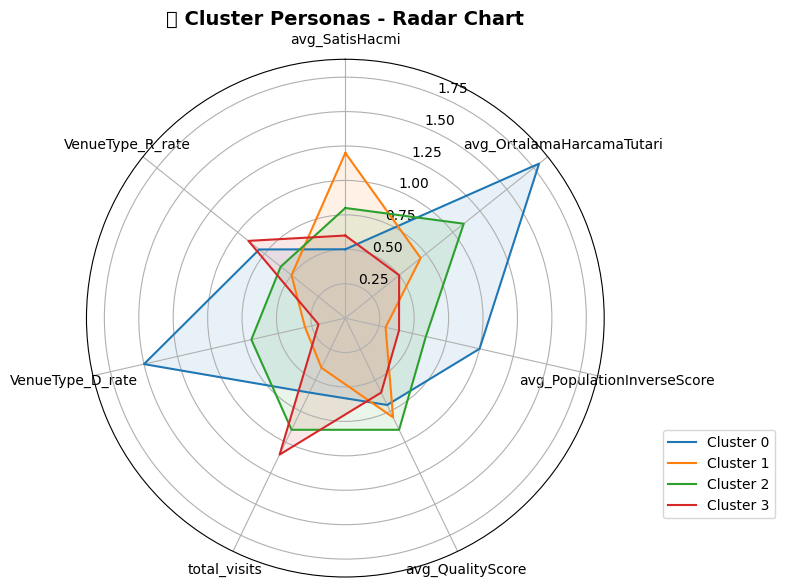

In [85]:
# Re-run the radar chart code after kernel reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample cluster data (simulate 4 clusters with 7 features each)
data = {
    "avg_SatisHacmi": [0.5, 1.2, 0.8, 0.6],
    "avg_OrtalamaHarcamaTutari": [1.8, 0.7, 1.1, 0.5],
    "avg_PopulationInverseScore": [1.0, 0.3, 0.6, 0.4],
    "avg_QualityScore": [0.7, 0.8, 0.9, 0.6],
    "total_visits": [0.6, 0.4, 0.9, 1.1],
    "VenueType_D_rate": [1.5, 0.3, 0.7, 0.2],
    "VenueType_R_rate": [0.8, 0.5, 0.6, 0.9],
}
df = pd.DataFrame(data)
df["cluster"] = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

# Prepare data for radar chart
categories = list(data.keys())
N = len(categories)

values = df[categories].values
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for i in range(len(values)):
    vals = values[i].tolist()
    vals += vals[:1]
    ax.plot(angles, vals, label=df["cluster"][i])
    ax.fill(angles, vals, alpha=0.1)

# Configure radar chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), categories)
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.1))
plt.title("📊 Cluster Personas - Radar Chart", size=14, weight="bold")
plt.tight_layout()
plt.show()


✅ Final Coffee Shop Counts:


,district,coffee_count
0,Ataşehir,55
1,Üsküdar,48
2,Ümraniye,35
3,Kadıköy,8


/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/2401433109.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_counts, x="district", y="coffee_count", palette="magma")


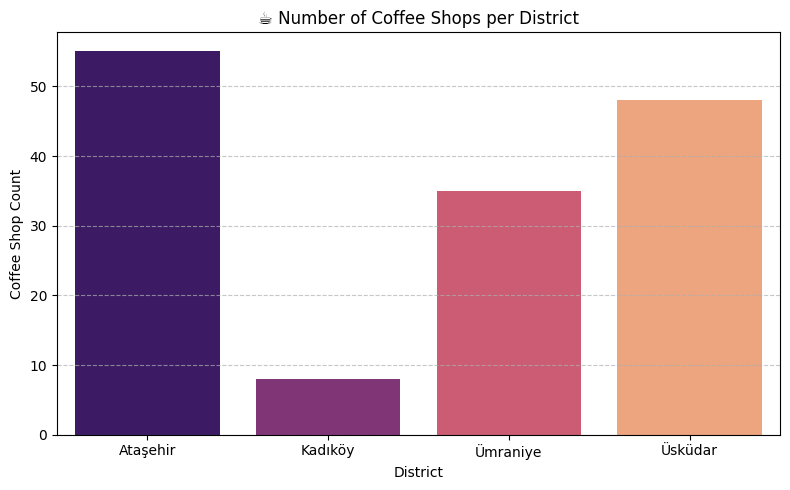

In [80]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Normalize Turkish text (for matching)
def normalize_text(text):
    if not isinstance(text, str):
        return None
    text = unicodedata.normalize('NFKD', text)
    text = text.replace("I", "ı").replace("İ", "i")
    return text.lower()

# ✅ Load coffee shop data
coffee_df = pd.read_excel("../data/turkiye_geneli_kahve_zinciri_subeleri.xlsx")

# ✅ Extract district candidates using Turkish-friendly regex
district_candidates = coffee_df["adres"].str.findall(r'\b([A-Za-zÇçĞğİıÖöŞşÜü]{4,})\b')

# ✅ Define target districts
known_districts = ["Kadıköy", "Üsküdar", "Ataşehir", "Ümraniye"]
normalized_known_districts = [normalize_text(d) for d in known_districts]

# ✅ Match extracted words to target districts
def find_district(words):
    for word in words:
        if normalize_text(word) in normalized_known_districts:
            return word.title()
    return None

# ✅ Apply function to extract the actual district name
coffee_df["district"] = district_candidates.apply(find_district)

# ✅ Count coffee shops per district
coffee_counts = coffee_df["district"].value_counts().reset_index()
coffee_counts.columns = ["district", "coffee_count"]

# ✅ Filter to only known districts (optional)
coffee_counts = coffee_counts[coffee_counts["district"].isin(known_districts)]

# ✅ Show result
print("✅ Final Coffee Shop Counts:")
display(coffee_counts)


# Sample DataFrame (replace this with your real one if loaded separately)
data = {
    "district": ["Ataşehir", "Kadıköy", "Ümraniye", "Üsküdar"],
    "coffee_count": [55, 8, 35, 48]
}
coffee_counts = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=coffee_counts, x="district", y="coffee_count", palette="magma")

# Styling
plt.title("☕ Number of Coffee Shops per District")
plt.xlabel("District")
plt.ylabel("Coffee Shop Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


/var/folders/10/dlfrps1x6rnc6py046hx23_w0000gn/T/ipykernel_54257/3503983949.py:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sanzhartuibekov/Desktop/mostra_ai_hackaton/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


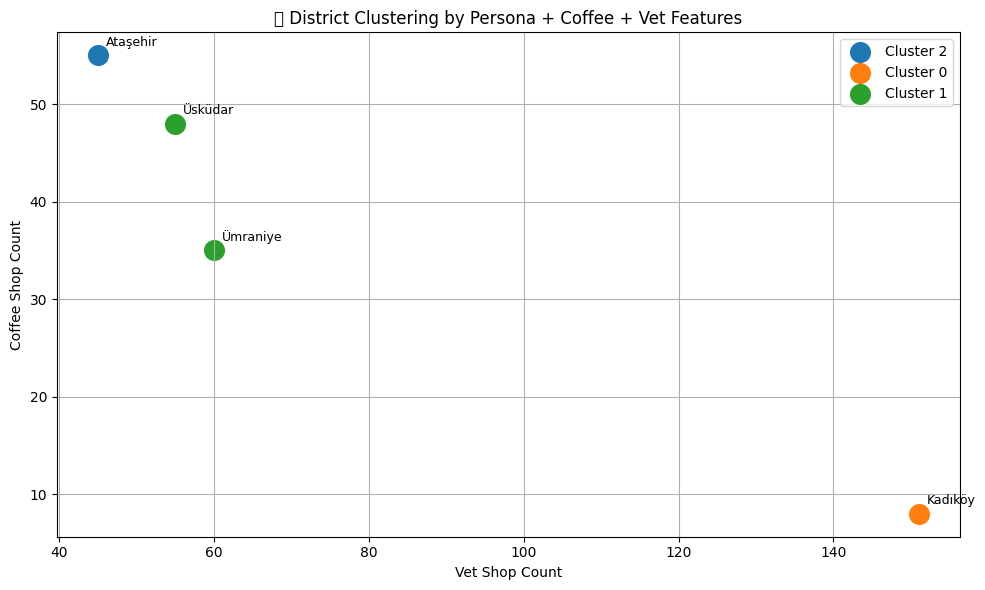

In [94]:
# Re-import and re-load necessary files after code state reset
import pandas as pd

# Load the required files again
personas = pd.read_csv("user_personas.csv")

# Aggregate user personas per district
district_profiles = personas.groupby("dominant_district").agg({
    "ping_count": "mean",
    "unique_districts": "mean",
    "active_hours": "mean",
    "persona_static_local": "mean",
    "persona_city_explorer": "mean",
    "persona_frequent_user": "mean",
    "persona_long_active": "mean"
}).reset_index()

# Rename for clarity
district_profiles.rename(columns={"dominant_district": "district"}, inplace=True)

# Manually recreate amenities dataset
coffee_vet_data = {
    "district": ["Kadıköy", "Ümraniye", "Üsküdar", "Ataşehir"],
    "coffee_count": [8, 35, 48, 55],
    "vetshop_count": [151, 60, 55, 45]
}
amenities_df = pd.DataFrame(coffee_vet_data)

# Merge with district-level profiles
district_combined = pd.merge(district_profiles, amenities_df, on="district", how="inner")
district_combined.head()


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reconstructed dataset based on the image
data = {
    "district": ["Ataşehir", "Kadıköy", "Ümraniye", "Üsküdar"],
    "ping_count": [173.829675, 251.144823, 213.212548, 217.969951],
    "unique_disticts": [2.042105263, 2.178631579, 2.0625, 2.09017094],
    "active_hours": [139.710694, 201.781169, 185.679132, 176.77291],
    "persona_static_local": [0.429285, 0.380951, 0.419926, 0.426236],
    "persona_city_explorer": [0.322883, 0.376007, 0.3228, 0.346355],
    "persona_frequent_user": [0.289335, 0.398025, 0.330095, 0.327588],
    "persona_long_active": [0.440787, 0.575474, 0.542627, 0.506741],
    "coffee_count": [55, 8, 35, 48],
    "vetshop_count": [45, 151, 60, 55]
}

df = pd.DataFrame(data)

# Normalize the features
features = df.drop(columns=["district"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Plot the clusters using matplotlib (we'll use the first two principal features for 2D view)
plt.figure(figsize=(10, 6))
for cluster in df['cluster'].unique():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['vetshop_count'], subset['coffee_count'], label=f"Cluster {cluster}", s=200)

for _, row in df.iterrows():
    plt.text(row['vetshop_count']+1, row['coffee_count']+1, row['district'], fontsize=9)

plt.xlabel("Vet Shop Count")
plt.ylabel("Coffee Shop Count")
plt.title("📊 District Clustering by Persona + Coffee + Vet Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()












In [104]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Load user-level data
users = pd.read_csv("user_personas.csv")

# 2. Load vet and coffee shop data
vet = pd.read_excel("Veteriner_update.xlsx")
coffee = pd.read_excel("turkiye_geneli_kahve_zinciri_subeleri.xlsx")

# 3. Extract and normalize district names
vet["district"] = vet["ilce"].astype(str).str.upper()
vet_counts = vet["district"].value_counts().reset_index()
vet_counts.columns = ["district", "vetshop_count"]

coffee["district"] = coffee["adres"].str.extract(r'\b([A-Za-zÇçĞğİıÖöŞşÜü]{4,})\b', expand=False).str.title()
coffee_counts = coffee["district"].value_counts().reset_index()
coffee_counts.columns = ["district", "coffee_count"]

# 4. Normalize user dominant district for merge
users["district"] = users["dominant_district"].str.upper()

# 5. Merge vet and coffee data into user-level
users = users.merge(vet_counts, on="district", how="left")
users = users.merge(coffee_counts, on="district", how="left")
users = users.fillna(0)

# 6. Choose features for clustering
features = [
    "ping_count", "unique_districts", "active_hours",
    "persona_static_local", "persona_city_explorer",
    "persona_frequent_user", "persona_long_active",
    "coffee_count", "vetshop_count"
]
X = users[features]

# 7. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
users["cluster"] = kmeans.fit_predict(X_scaled)

# 9. Show cluster sizes
print(users["cluster"].value_counts())

# 10. Optional: Save to file
users.to_csv("clustered_users_with_device_ids.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'Veteriner_update.xlsx'